# custom-svm
Project for the **Combinatorial Decision Making and Optimization** course - Master in AI, *Alma Mater Studiorum*.
#### Authors:
 - Mattia Orlandi
 - Lorenzo Mario Amorosa

Import the required libraries, in particular the custom implementation of SVM contained in the `svm.py` module, 
the custom implementation of multiclass SVm contained in `multiclass_svm.py` module and the dataset 
generator (`sample_data_generator.py`).  
Set some useful constants, like the random state `RND`, the number of samples `N_SAMP` 
and the number of features `N_FEAT`.

In [1]:
from svm import SVM
from multiclass_svm import MulticlassSVM
from data.sample_data_generator import *
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

RND = 42
N_SAMP = 200
N_FEAT = 2

Define a useful function which, given a `SVM` object, the training and the test sets, 
performs the following operations:
- `SVM.fit(...)` on the training set;
- `SVM.predict(...)` on the test set;
- computes the accuracy score;
- plots the result (only for our svm).

In [2]:
def fit_and_predict(svm: SVM,
                    X_train: np.ndarray,
                    X_test: np.ndarray,
                    y_train: np.ndarray,
                    y_test: np.ndarray,
                    x_min: Optional[float] = None,
                    x_max: Optional[float] = None,
                    y_min: Optional[float] = None,
                    y_max: Optional[float] = None,
                    verbosity: Optional[int] = 1,
                    is_binary_custom_svm: Optional[bool] = True):
    if is_binary_custom_svm:
        svm.fit(X_train, y_train, verbosity)
    else:
        svm.fit(X_train, y_train)
    y_pred = svm.predict(X_train)
    print('Accuracy on the training set: {0:.2f}%'.format(accuracy_score(y_train, y_pred) * 100))
    y_pred = svm.predict(X_test)
    print('Accuracy on the test set: {0:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
    if is_binary_custom_svm:
        svm.plot2D(X_train, y_train, x_min, x_max, y_min, y_max)
        

## 1. Sample datasets

Test the SVM on a linearly separable dataset.

3 support vectors found out of 150 data points
1) X: [0.296 6.211]	y: -1
2) X: [1.999 5.636]	y: 1
3) X: [1.214 4.681]	y: 1
Bias of the hyper-plane: 3.424
Weights of the hyper-plane: [ 0.919 -0.756]
Accuracy on the training set: 100.00%
Accuracy on the test set: 100.00%


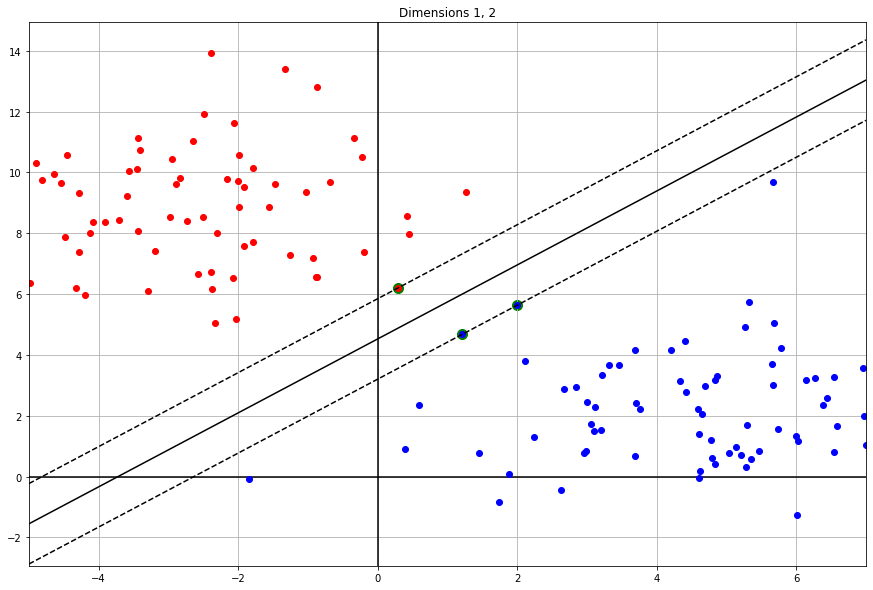

In [3]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = linear_data_generator(n_samples=N_SAMP,
                                                                         n_features=N_FEAT,
                                                                         random_state=RND)
svm_lin = SVM()
fit_and_predict(svm_lin, 
                X_train_lin, X_test_lin, 
                y_train_lin, y_test_lin, 
                x_min=-5., x_max=7., verbosity=2)

Test the SVM on the same dataset, but fitting only on the support vectors found.

3 support vectors found out of 3 data points
Bias of the hyper-plane: 3.424
Weights of the hyper-plane: [ 0.919 -0.756]
Accuracy on the training set: 100.00%
Accuracy on the test set: 100.00%


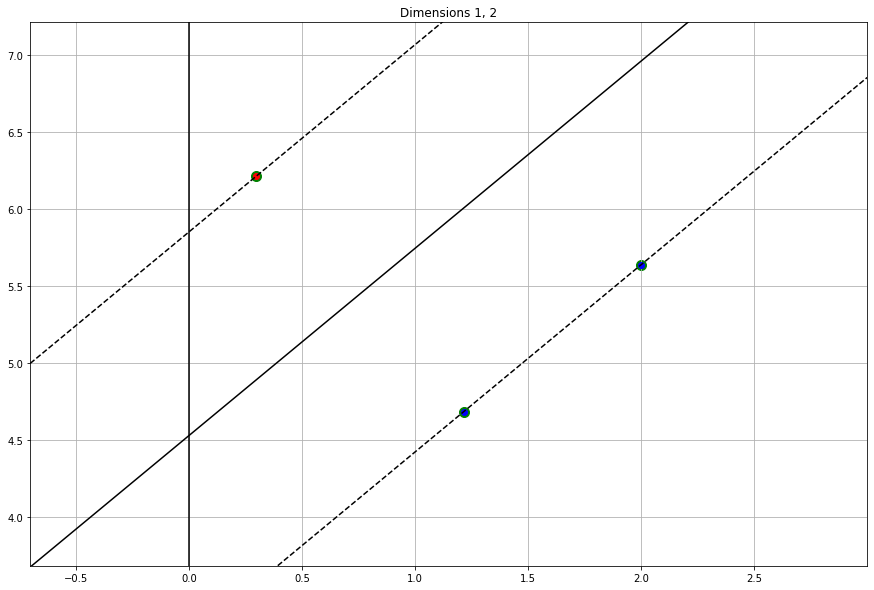

In [4]:
X_sv_lin, y_sv_lin = svm_lin.sv_X, svm_lin.sv_y
svm_lin = SVM()
fit_and_predict(svm_lin,
                X_sv_lin, X_test_lin,
                y_sv_lin, y_test_lin)

Test the SVM on a semi-linearly separable dataset which contains outliers.

5 support vectors found out of 150 data points
1) X: [ 0.801 -1.052]	y: 1
2) X: [ 1.076 -0.718]	y: 1
3) X: [-0.269 -2.717]	y: 1
4) X: [ 0.7 -0.6]	y: -1
5) X: [ 0.5 -0.7]	y: -1
Bias of the hyper-plane: -0.724
Weights of the hyper-plane: [ 0.677 -0.47 ]
Accuracy on the training set: 99.33%
Accuracy on the test set: 100.00%


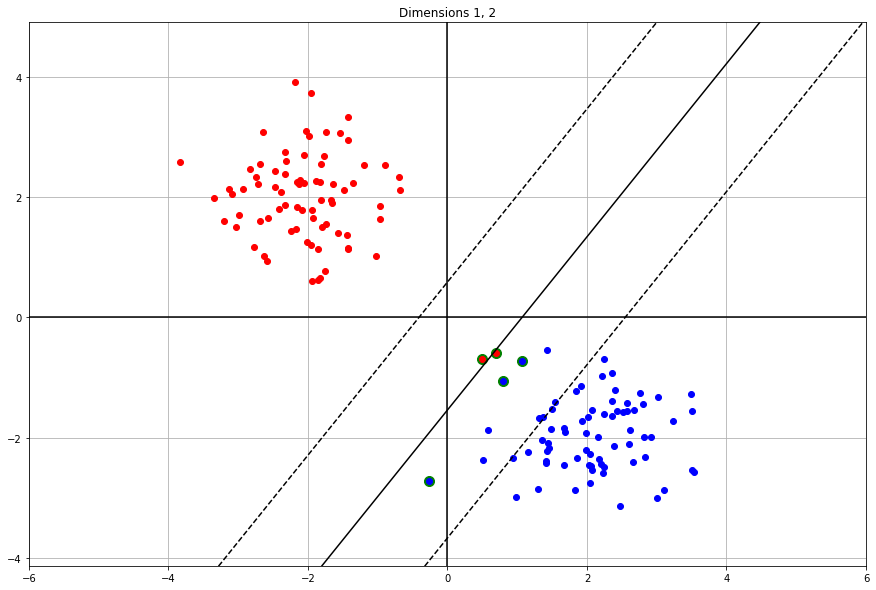

In [3]:
X_train_slin, X_test_slin, y_train_slin, y_test_slin = semi_linear_data_generator(n_samples=N_SAMP,
                                                                                  n_features=N_FEAT,
                                                                                  random_state=RND)
svm_slin = SVM()
fit_and_predict(svm_slin,
                X_train_slin, X_test_slin,
                y_train_slin, y_test_slin,
                x_min=-6., x_max=6., verbosity=2)

The use of a hard margin is not effective in this case. Setting a soft margin lead to a more general and robust model.

8 support vectors found out of 150 data points
1) X: [ 1.427 -0.535]	y: 1
2) X: [ 0.801 -1.052]	y: 1
3) X: [ 1.076 -0.718]	y: 1
4) X: [-0.269 -2.717]	y: 1
5) X: [-1.018  1.019]	y: -1
6) X: [ 0.7 -0.6]	y: -1
7) X: [-1.854  0.628]	y: -1
8) X: [ 0.5 -0.7]	y: -1
Bias of the hyper-plane: -0.306
Weights of the hyper-plane: [ 0.408 -0.405]
Accuracy on the training set: 98.67%
Accuracy on the test set: 100.00%


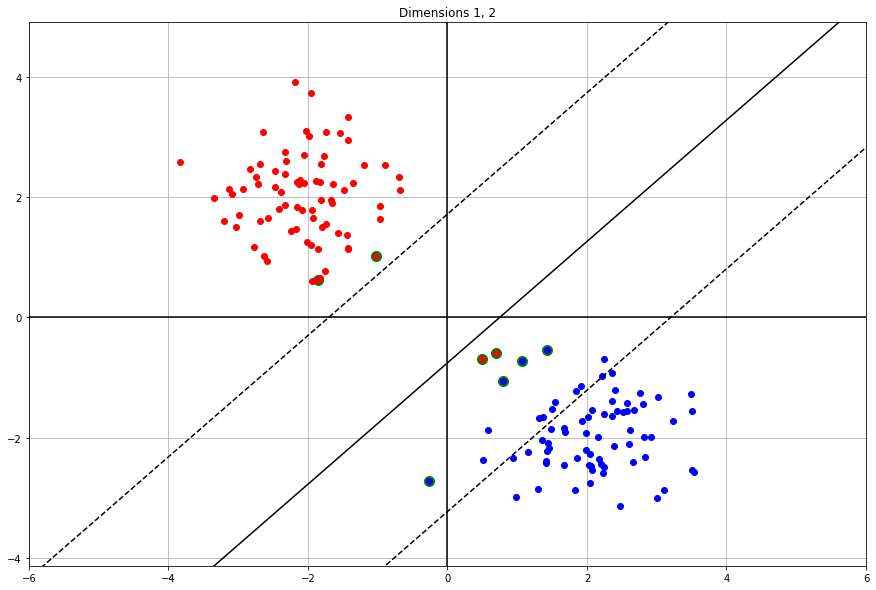

In [4]:
svm_slin = SVM(c=0.1)
fit_and_predict(svm_slin,
                X_train_slin, X_test_slin,
                y_train_slin, y_test_slin,
                x_min=-6., x_max=6., verbosity=2)

Test the SVM on a non-linear separable dataset using as kernel function `poly`.

148 support vectors found out of 150 data points
Bias of the hyper-plane: 0.044
Weights of the hyper-plane: None
Accuracy on the training set: 61.33%
Accuracy on the test set: 50.00%


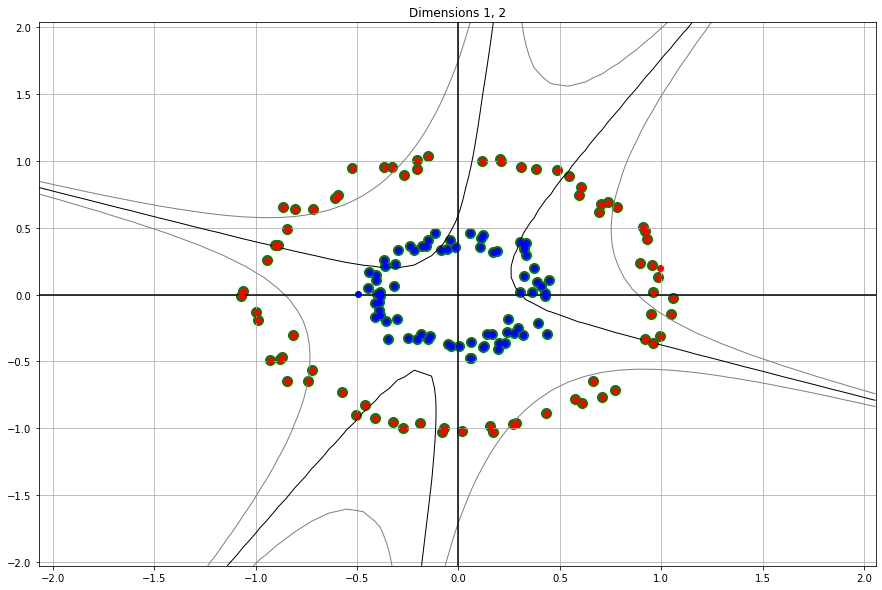

In [7]:
X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin = non_linear_data_generator(n_samples=N_SAMP,
                                                                                         random_state=RND)
svm_poly = SVM(kernel='poly', deg=3)
fit_and_predict(svm_poly,
                X_train_nonlin, X_test_nonlin,
                y_train_nonlin, y_test_nonlin,
                verbosity=1)

The kernel function `poly` does not seem adequate, the accuracy is really low. For this dataset, a kernel function `rbf` improves accuracy.

23 support vectors found out of 150 data points
1) X: [0.305 0.393]	y: 1
2) X: [-0.346 -0.334]	y: 1
3) X: [-0.495  0.004]	y: 1
4) X: [ 0.574 -0.781]	y: -1
5) X: [-0.271  0.894]	y: -1
6) X: [0.333 0.388]	y: 1
7) X: [ 0.059 -0.473]	y: 1
8) X: [-0.188 -0.962]	y: -1
9) X: [-0.115  0.462]	y: 1
10) X: [-0.814 -0.304]	y: -1
11) X: [ 0.158 -0.986]	y: -1
12) X: [0.695 0.62 ]	y: -1
13) X: [-0.723 -0.565]	y: -1
14) X: [-0.89   0.371]	y: -1
15) X: [0.322 0.358]	y: 1
16) X: [0.596 0.743]	y: -1
17) X: [ 0.947 -0.142]	y: -1
18) X: [ 0.056 -0.472]	y: 1
19) X: [0.893 0.234]	y: -1
20) X: [-0.574 -0.732]	y: -1
21) X: [ 0.663 -0.65 ]	y: -1
22) X: [ 0.438 -0.293]	y: 1
23) X: [-0.44  0.17]	y: 1
Bias of the hyper-plane: -1.015
Weights of the hyper-plane: None
Accuracy on the training set: 100.00%
Accuracy on the test set: 100.00%


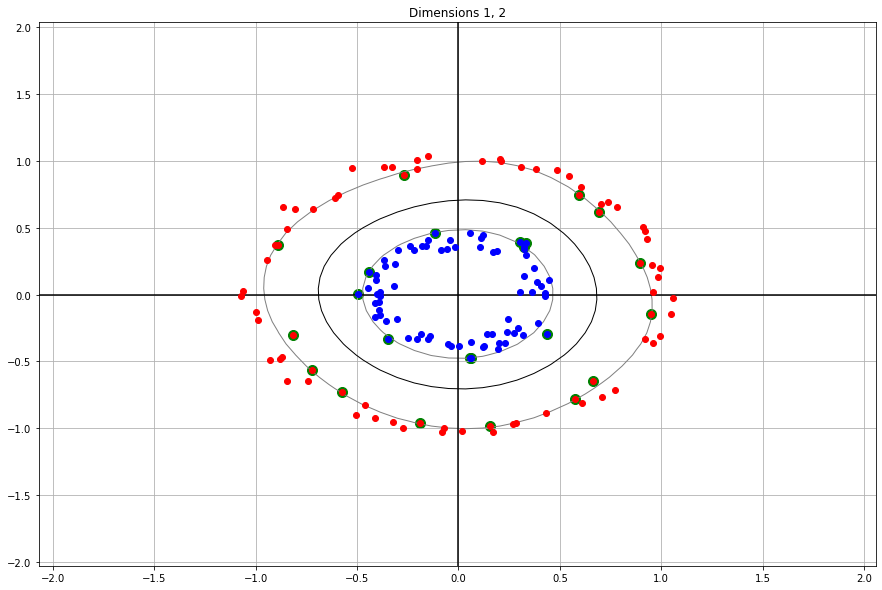

In [8]:
svm_nonlin = SVM(kernel='rbf')
fit_and_predict(svm_nonlin,
                X_train_nonlin, X_test_nonlin,
                y_train_nonlin, y_test_nonlin,
                verbosity=2)

Test the SVM on the same dataset, but fitting only on the support vectors found.

23 support vectors found out of 23 data points
Bias of the hyper-plane: -1.045
Weights of the hyper-plane: None
Accuracy on the training set: 100.00%
Accuracy on the test set: 100.00%


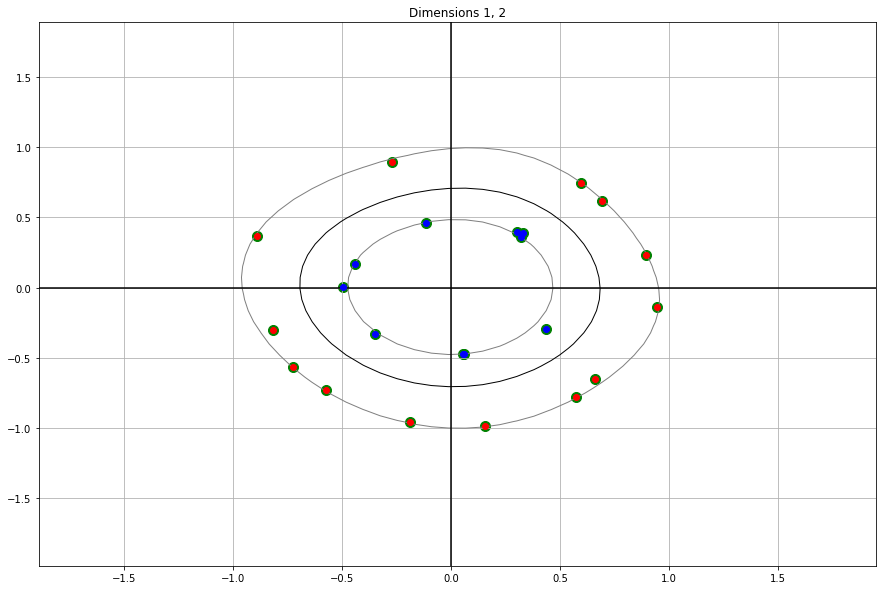

In [9]:
X_sv_nonlin, y_sv_nonlin = svm_nonlin.sv_X, svm_nonlin.sv_y
svm_nonlin = SVM(kernel='rbf')
fit_and_predict(svm_nonlin,
                X_sv_nonlin, X_test_nonlin,
                y_sv_nonlin, y_test_nonlin)

## 2. Sensor dataset

The following SVM models are tested on a dataset constructed by simulating measurements of distances between sensors and IoT devices in a building.

The task of the classifier is to predict the room in which the device is located given the input of the sensors.

Utility function to show a room.

In [10]:
def show_room(img_name: str):
    img = plt.imread(img_name)
    plt.figure(figsize = (15,15))
    plt.axis('off')
    plt.imshow(img)
    plt.show()

In the following figure, it is given a floor with 2 rooms (blue and red) and 5 sensors.

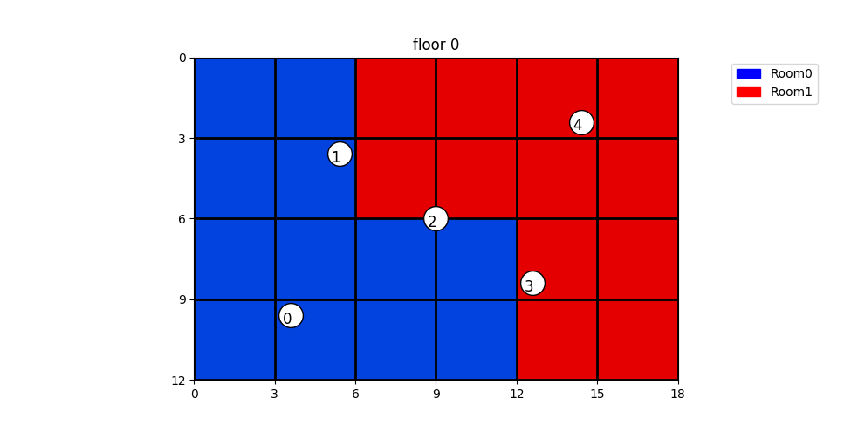

In [11]:
show_room('data/data_png/2_rooms.png')

Utility function to read and process the dataset.

In [12]:
def read_dataset(f_name: str):
    X_raw = []
    y_raw = []
    with open(f_name, "r") as file:
        for line in file:
            features = line.split(',')[:-1]
            X_raw.append(features)
            y_raw.append(line.split(',')[-1])
    X = np.array(X_raw).astype(np.float)
    y_tmp = np.array(y_raw).astype(np.float)
    y = np.fromiter((-1 if yi == 0 else 1 for yi in y_tmp), y_tmp.dtype)
    return train_test_split(X, y, test_size=0.2, random_state=RND)

Test the SVM on a dataset sampled from the previous room.

477 support vectors found out of 800 data points
Bias of the hyper-plane: 0.023
Weights of the hyper-plane: None
Accuracy on the training set: 86.75%
Accuracy on the test set: 86.50%


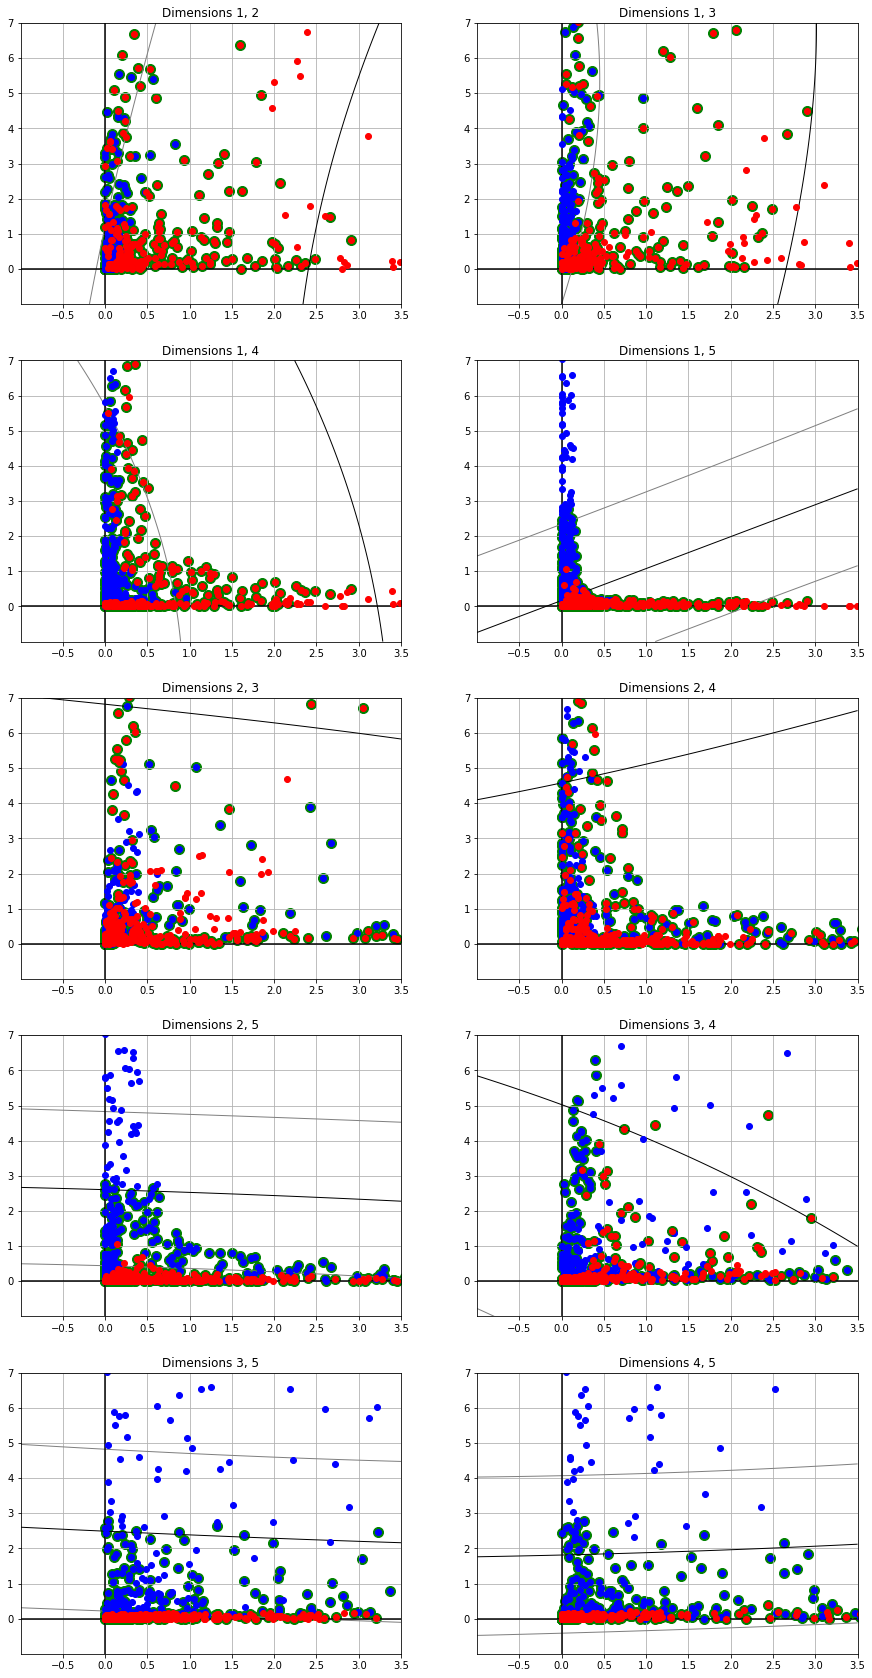

In [13]:
f_name_bin ="data/data_2_rooms.txt"
X_train_binsens, X_test_binsens, y_train_binsens, y_test_binsens = read_dataset(f_name_bin)
svm_binsens = SVM(kernel="rbf")
fit_and_predict(svm_binsens,
                X_train_binsens, X_test_binsens,
                y_train_binsens, y_test_binsens,
                x_min=0., x_max=3.5, y_min=0., y_max=7.)

Compare the previous result with `sklearn.SVC`

In [14]:
svc = SVC(kernel="rbf", gamma="scale")
fit_and_predict(svc,
                X_train_binsens, X_test_binsens,
                y_train_binsens, y_test_binsens,
                is_binary_custom_svm=False)
print('{0:d} support vectors found out of {1:d} data points'.format(len(svc.support_), len(X_train_binsens)))

Accuracy on the training set: 85.88%
Accuracy on the test set: 86.00%
459 support vectors found out of 800 data points


In the following figure, it is given a building with 2 floors, 10 rooms and 20 sensors.

A new dataset is sampled.

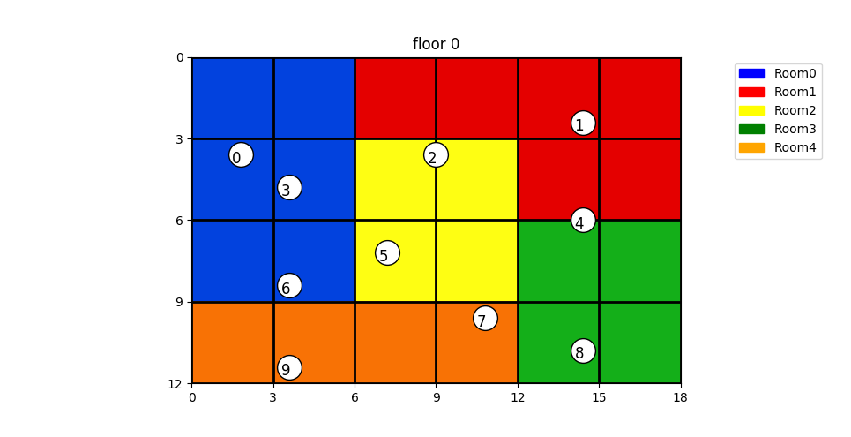

In [15]:
show_room('data/data_png/10_rooms_floor0.png')

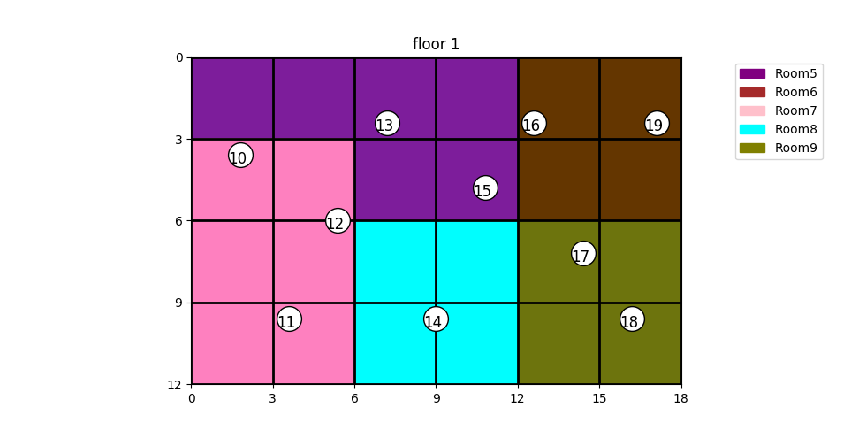

In [16]:
show_room('data/data_png/10_rooms_floor1.png')

Test the `MulticlassSVM` from the dataset sampled from the previous rooms.

In [16]:
f_name_mul ="data/data_10_rooms.txt"
X_train_mulsens, X_test_mulsens, y_train_mulsens, y_test_mulsens = read_dataset(f_name_mul)
svm_mulsens = MulticlassSVM(kernel="rbf")
fit_and_predict(svm_mulsens,
                X_train_mulsens, X_test_mulsens,
                y_train_mulsens, y_test_mulsens,
                is_binary_custom_svm=False)


808 support vectors found out of 8000 data points:
Accuracy on the training set: 87.58%
Accuracy on the test set: 87.15%


Compare the previous result with `sklearn.SVC` for multiclassification

In [11]:
svc = SVC(kernel="rbf", gamma="scale", decision_function_shape='ovo')
fit_and_predict(svc,
                X_train_mulsens, X_test_mulsens,
                y_train_mulsens, y_test_mulsens,
                is_binary_custom_svm=False)
print('{0:d} support vectors found out of {1:d} data points'.format(len(svc.support_), len(X_train_mulsens)))

Accuracy on the training set: 91.84%
Accuracy on the test set: 91.80%
776 support vectors found out of 8000 data points
